In [1]:
import pickle
import random

import pyleoclim as pyleo
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import ammonyte as amt

from matplotlib.gridspec import GridSpec
from tqdm import tqdm

In [2]:
end_time=10000

NGRIP_lipd = pyleo.Lipd('./data/8k_ice/NGRIP.NGRIP.2004.lpd')
NGRIP_tso = NGRIP_lipd.to_LipdSeriesList()
NGRIP_series = NGRIP_tso[0].slice((0,end_time))
NGRIP_series.time_unit = 'ka'

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: NGRIP.NGRIP.2004.lpd
Finished read: 1 record
extracting paleoData...
extracting: NGRIP.NGRIP.2004
Created time series: 3 entries
Both age and year information are available, using age
Both age and year information are available, using age
Both age and year information are available, using age


/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_75398/2600103537.py:3: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  NGRIP_lipd = pyleo.Lipd('./data/8k_ice/NGRIP.NGRIP.2004.lpd')


In [3]:
level=4
m=13
eps=1
series = NGRIP_series

spike_series = series.copy()
spike_series.value = np.zeros(len(spike_series.value))
index = np.where((spike_series.time >= 7800) & (spike_series.time <= 8400))[0]
spike = -1+(1/len(index))*np.arange(len(index))
spike_series.value[index] += spike
success_counter=0
noise_series = pyleo.Series(*pyleo.utils.gen_ts(model='ar1',t=spike_series.time,scale=1/level))
noisy_spike = spike_series.copy()
noisy_spike.value += noise_series.value

apply_series=noisy_spike.convert_time_unit('Years')
amt_series = amt.Series(
    time=apply_series.time,
    value=apply_series.value,
    time_name = apply_series.time_unit,
    value_name = apply_series.value_name,
    time_unit = apply_series.time_unit,
    value_unit = apply_series.value_unit,
    label = apply_series.label,
    sort_ts=None
)
td = amt_series.embed(m)
eps_res = td.find_epsilon(eps=eps,parallelize=False)
rm = eps_res['Output']
lp_series = rm.laplacian_eigenmaps(20,2)
lp_series = lp_series.convert_time_unit('ka')

/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:153: UserWarning: No time_unit parameter provided. Assuming years CE.
  warnings.warn(f'No time_unit parameter provided. Assuming {time_unit}.', UserWarning)
/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Time axis values sorted in ascending order
Initial density is 0.0314
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0314
Epsilon: 1.0928, Density: 0.0592
Epsilon: 1.0928, Density: 0.0592.


/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Text(0.5, 0, 'Age [Kyr BP]')

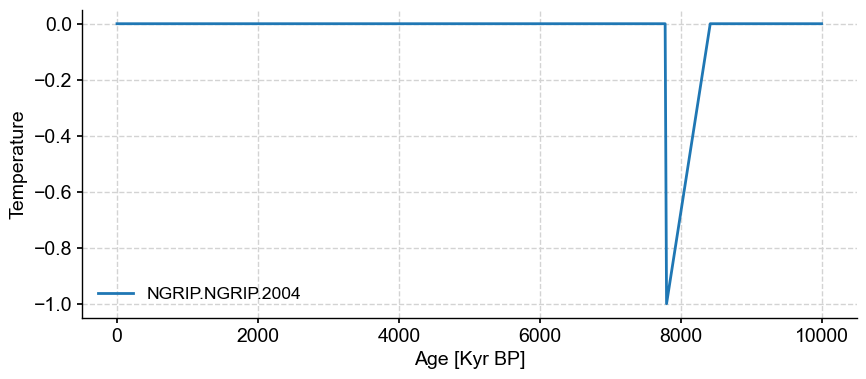

In [4]:
fig,ax=spike_series.plot()

ax.set_ylabel('Temperature')
ax.set_xlabel('Age [Kyr BP]')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

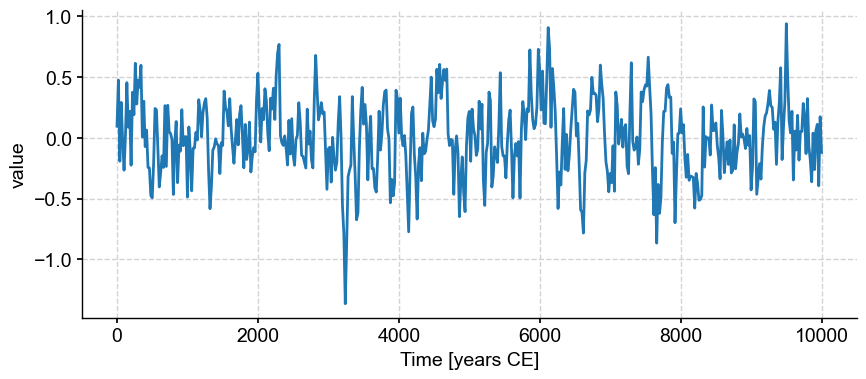

In [5]:
noise_series.plot()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ka]', ylabel='d18O [permil]'>)

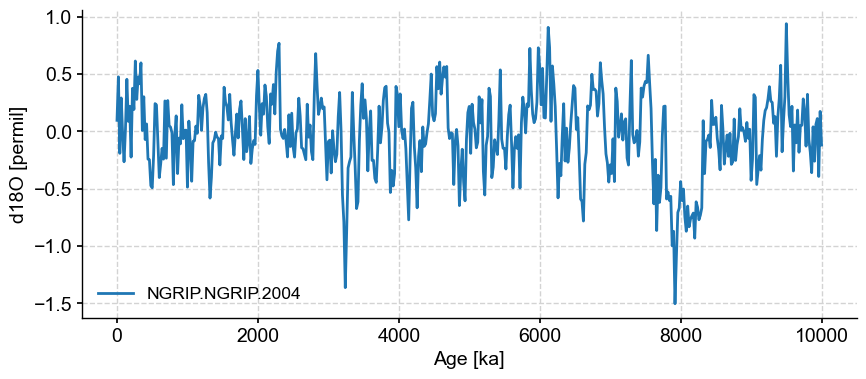

In [6]:
noisy_spike.plot()

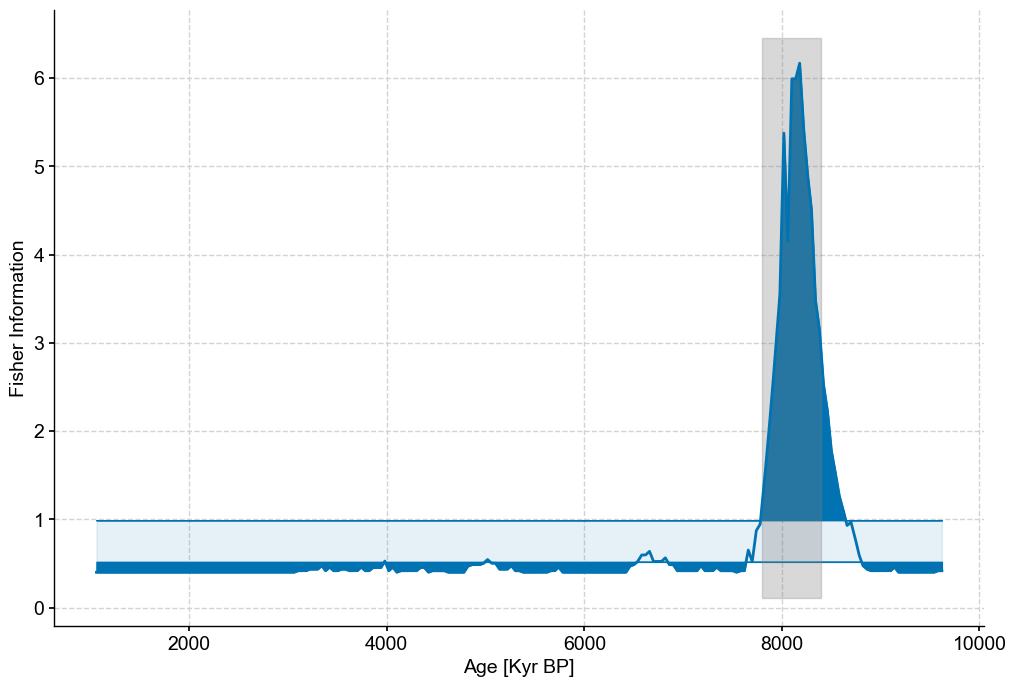

In [7]:
fig,ax=lp_series.confidence_fill_plot()

ax.set_ylabel('Fisher Information')
ax.set_xlabel('Age [Kyr BP]')
ylim=ax.get_ylim()
ax.fill_betweenx(ylim,7800,8400,color='grey',alpha=.3)
ax.legend().set_visible(False)

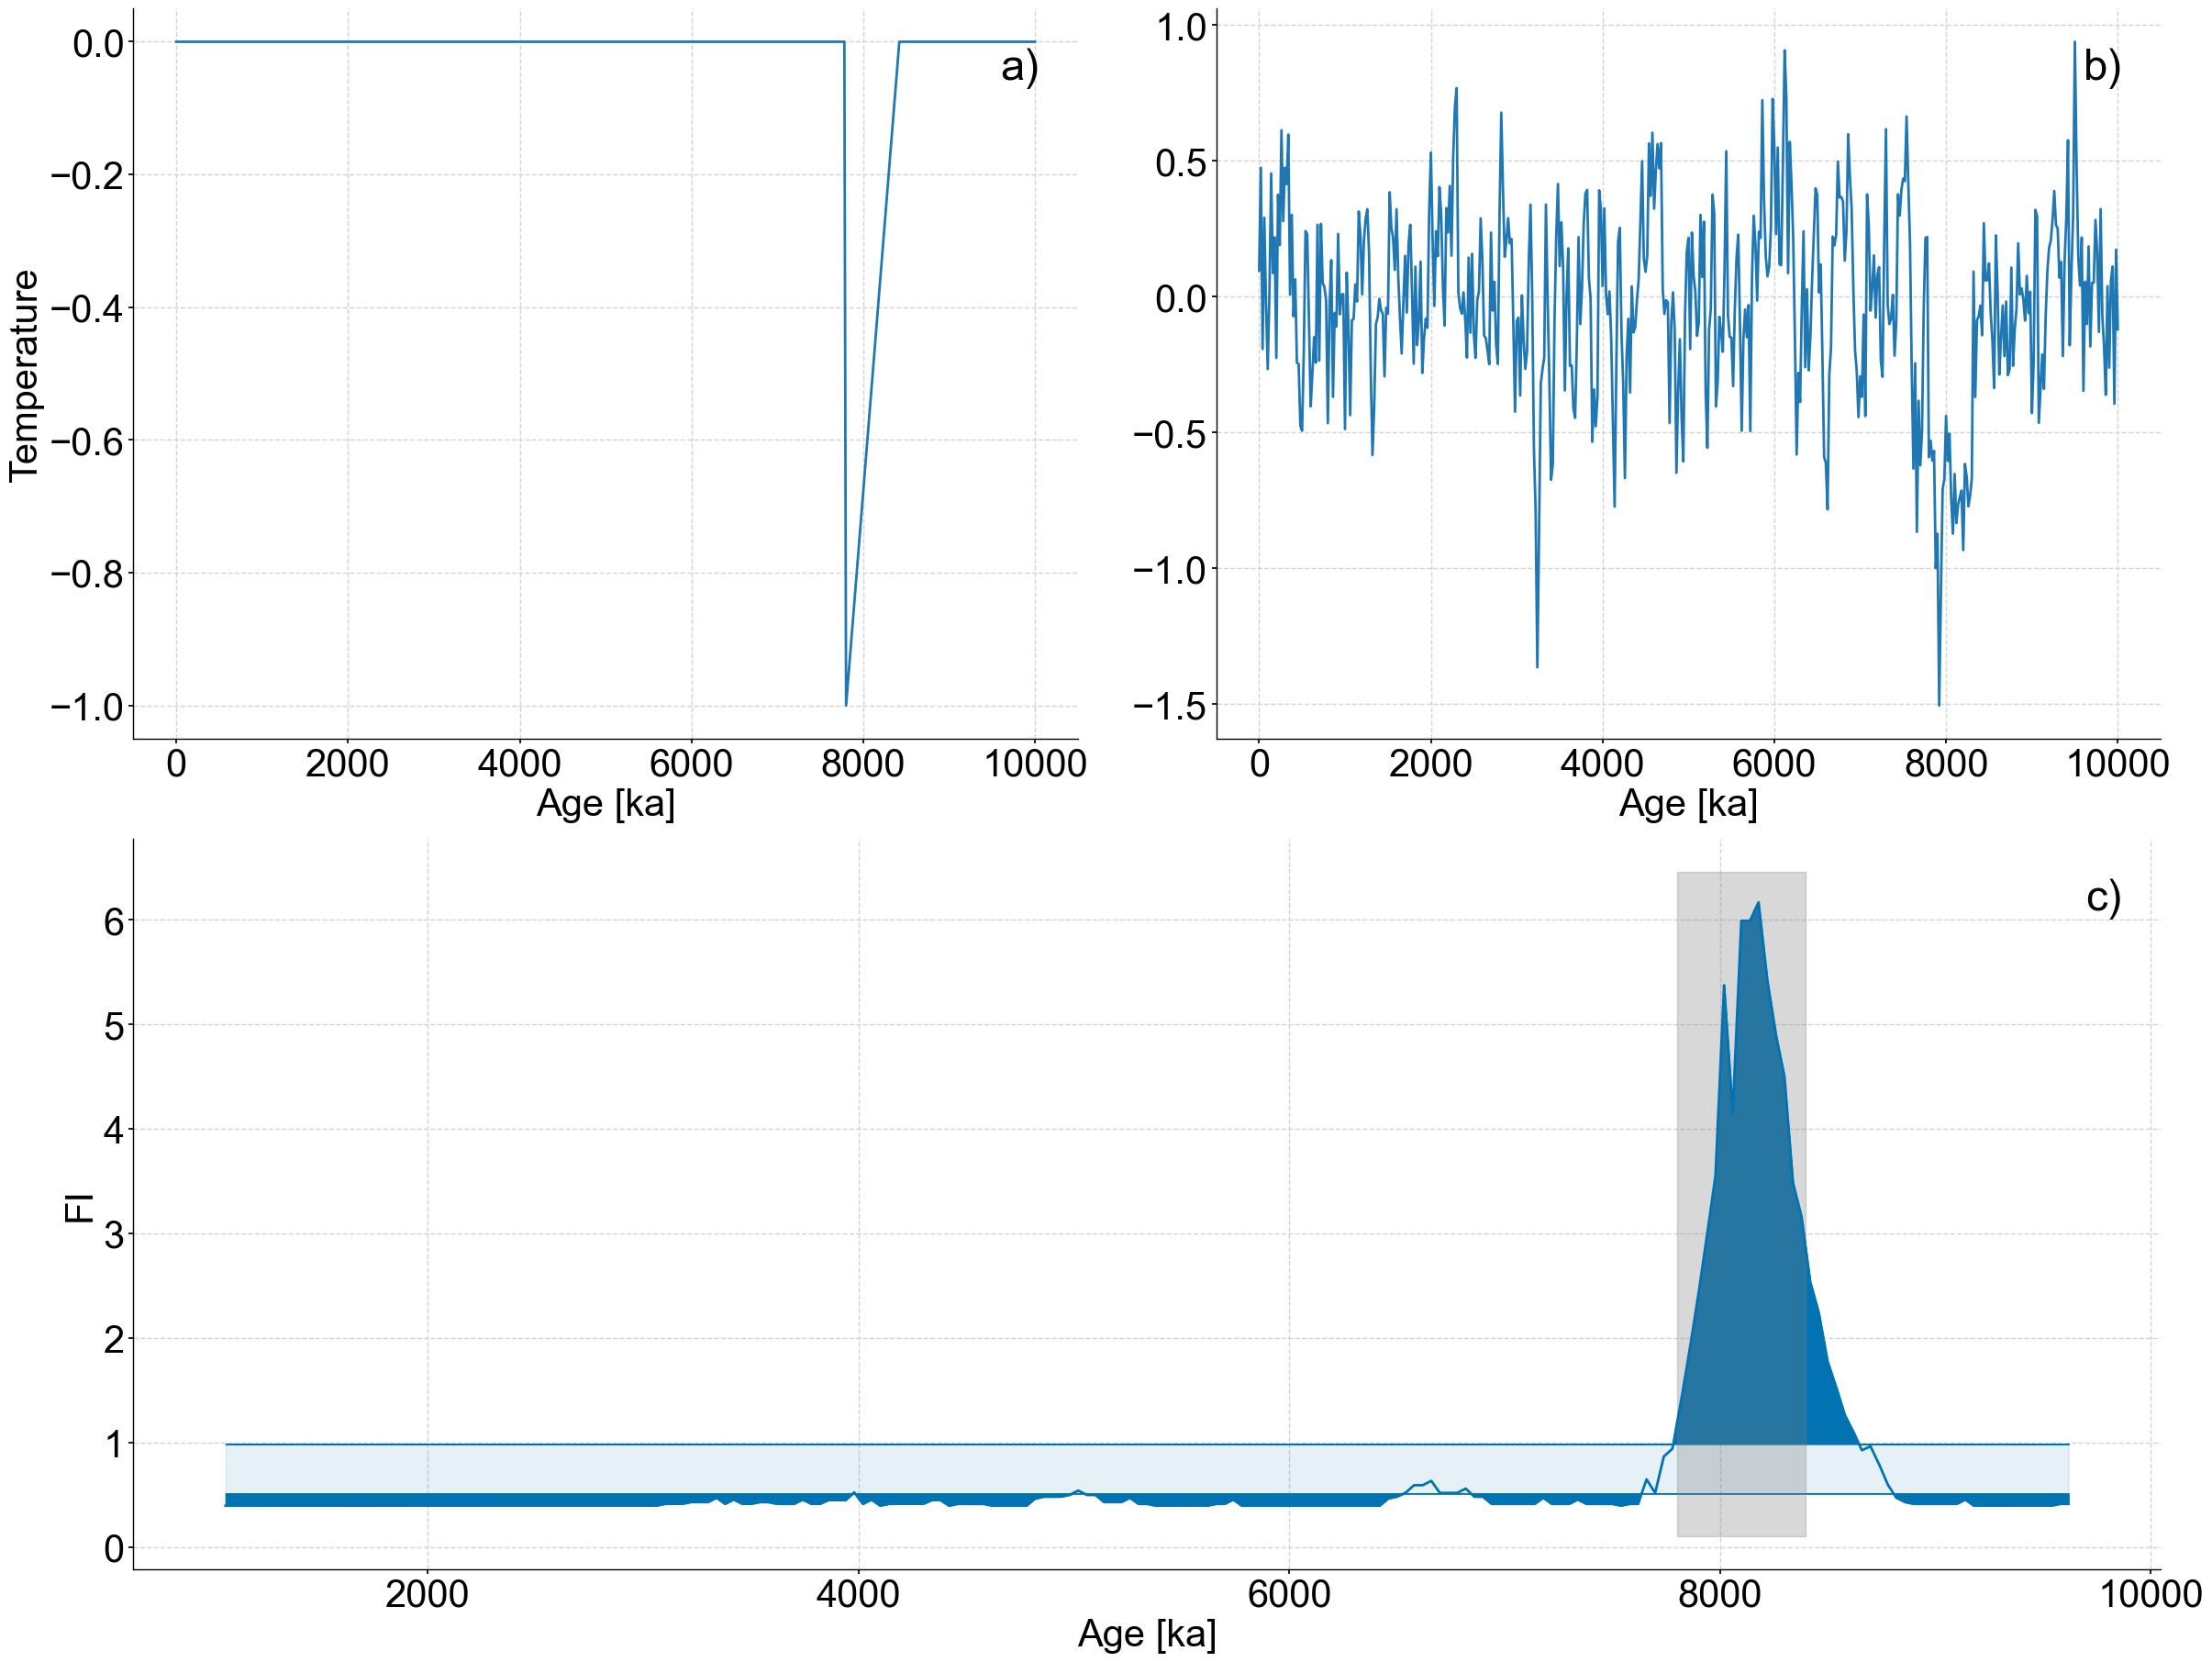

In [8]:
#Production figure

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 34

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig = plt.figure(constrained_layout=True,figsize=(24,18))
gs = GridSpec(2, 2, figure=fig)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

spike_series.plot(ax=ax1,legend=False,ylabel='Temperature')
patch = mpatches.Patch(fc="w", fill=False, edgecolor='none', linewidth=0,label='a)')
ax1.legend(handles=[patch],loc='upper right')

noisy_spike.plot(ax=ax2,legend=False,ylabel='')
patch = mpatches.Patch(fc="w", fill=False, edgecolor='none', linewidth=0,label='b)')
ax2.legend(handles=[patch],loc='upper right')

lp_series.confidence_fill_plot(ax=ax3,legend=None,ylabel='FI')
ax3.fill_betweenx(ylim,7800,8400,color='grey',alpha=.3)
patch = mpatches.Patch(fc="w", fill=False, edgecolor='none', linewidth=0,label='c)')
ax3.legend(handles=[patch],loc='upper right')